In [1]:
import os
import keras
import numpy as np
from PIL import Image
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
from keras import backend as k
from keras.utils import np_utils
from keras.optimizers import adam
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import img_to_array
from keras.metrics import categorical_crossentropy
#from sklearn.cross_validation import train_test_split
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D



Using TensorFlow backend.


In [3]:
#process for reproducing same result
import os
import random as rm

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/fchollet/keras/issues/2280#issuecomment-306959926
os.environ['PYTHONHASHSEED']='0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(37)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rm.seed(1245)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.set_random_seed(123)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res
from keras import backend as k

sess=tf.Session(graph=tf.get_default_graph())
k.set_session(sess)

In [4]:
pp='/Users/atousa/Desktop/McMaster/BDA-102/Neural_network/data/'
train_path=pp+'cat-and-dog/training_set/'
valid_path=pp+'cat-and-dog/valid_set/'
test_path=pp+'cat-and-dog/test_set/'

The ImageDataGenerator class has two methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images. flow_from_directory() is useful when the images are sorted and placed in there respective class/label folders. flow_from_dataframe() is useful when the images are clustered in only one folder. To put in other words images from different class/labels reside in only one folder. 

1- here we remove the colors because in dog vs cat is not a key feature makes the array a 2D grayscale make a 2D matrix while if we do not apply grayscale we have a BRG image which generate a tensore

2- The images should be the same size

3- check to have comparable data for each categories, it they are not comparable apply weigth on the loss function


4-Normalize data with keras.util.normalize/ as max of image pixel is 255 can be divided by 255(The most common  pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255.)

In [7]:
from keras.preprocessing.image import ImageDataGenerator
img_size=224

datagen = ImageDataGenerator(rescale=1./255)
train_batches=datagen.flow_from_directory(
               train_path,
               target_size=(img_size,img_size),
               classes=['dogs','cats'],
               batch_size=50,
               color_mode="grayscale")
valid_batches=datagen.flow_from_directory(
               valid_path,
               target_size=(img_size,img_size),
               classes=['dogs','cats'],
               batch_size=10,
               color_mode="grayscale")
test_batches=datagen.flow_from_directory(
               test_path,
               target_size=(img_size,img_size),
               classes=['dogs','cats'],
               batch_size=10,
               color_mode="grayscale")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
img,lables=next(train_batches)

In [22]:
lables[0:5,:]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [11]:
np.shape(img)

(50, 224, 224, 1)

In [12]:
#Here the picture is 224,224 and 1 is showing the grayscale. if we use RBG the 1 will convert to 3
np.shape(img[0])

(224, 224, 1)

In [13]:
np.shape(img[0][:,:,0])

(224, 224)

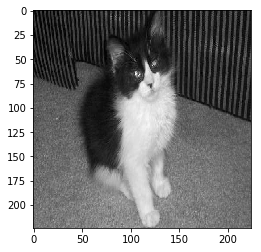

In [14]:
for i in range(0,1):
    image = img[i]
    plt.imshow(image[:,:,0], cmap='gray')
    plt.show()
#.astype('uint8')

# Build CNN

1-convolution layer input are: number of the features , convolution window and the shape of each image

2- max pool input: is the window of max pooling

3-Here we apply Convolution filter=3*3 and grayscale image=(224,224,1)

In [27]:
# here we can replace img.shape[1:] by (224,224,1)
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=img.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3),input_shape=img.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Dense layer is one dimentional data set while convolution is 2 dimentional dataset
model.add(Flatten())
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation(tf.nn.softmax)) #sigmoid

W0705 10:37:27.386611 140735592440704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:59: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 10:37:27.389837 140735592440704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:432: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 10:37:27.704534 140735592440704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3535: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 10:37:27.898290 140735592440704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3378: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0705 10:37:27.941461 140735592440704 deprecation.py:50

In [35]:
model

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________

batch size tell you how many data pass at the time

optimizers in keras

http://www.machineintellegence.com/different-types-of-activation-functions-in-keras/

In [29]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["categorical_accuracy"])

W0705 10:37:51.357059 140735592440704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/optimizers.py:697: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 10:37:51.392669 140735592440704 deprecation.py:506] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2745: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0705 10:37:51.406800 140735592440704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2749: The name tf.log is deprecated. Please use tf.math.log instead.



By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 shows you nothing (silent)

verbose=1 shows you an animated progress with a progress bar

verbose=2 shows the number of epoch:



steps_per_epoch: Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. It should typically be equal to the number of unique samples of your dataset divided by the batch size.

In [30]:
#When you use fit_generator, the number of samples processed for each epoch is batch_size * steps_per_epochs.
#let num_epoch * batch_size * setps_per_epoch > num_images.
#So that during training process, all your images can be used at least once.

from keras.callbacks import TensorBoard

model.fit_generator(
                generator=train_batches,
                validation_data=valid_batches,
                steps_per_epoch=4,#train_batches.samples(8005)/train_batches.batch_size(50),
                validation_steps=4,#valid_batches.samples/valid_batches.batch_size,
                verbose=2,
                #shuffle=False,
                epochs=3)

W0705 10:37:59.568125 140735592440704 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 10:37:59.662373 140735592440704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:879: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0705 10:37:59.681476 140735592440704 deprecation.py:506] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:602: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
24s - loss: 4.5909 - categorical_accuracy: 0.4750 - val_loss: 1.0999 - val_categorical_accuracy: 0.7000
Epoch 2/3
13s - loss: 1.2438 - categorical_accuracy: 0.5000 - val_loss: 0.7749 - val_categorical_accuracy: 0.4500
Epoch 3/3
12s - loss: 0.7175 - categorical_accuracy: 0.5350 - val_loss: 0.7389 - val_categorical_accuracy: 0.4000


# Test 

In [31]:
test_img,test_label=next(test_batches)

Here the values of the index of 1 appear in hot code. 0 means [1,0] and 1 means [0,1]

In [32]:
test_batches.class_indices

{'dogs': 0, 'cats': 1}

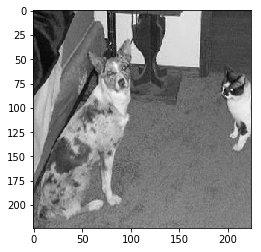

In [33]:
for i in range(0,1):
    image = test_img[i]
    plt.imshow(image[:,:,0], cmap='gray')
    plt.show()      

In [52]:
test_label[:,0]

array([1., 1., 0., 0.], dtype=float32)

In [53]:
predictor=model.predict_generator(test_batches,steps=1,verbose=0)

In [54]:
predictor[:,0]

array([0.4772556 , 0.49363938, 0.47383076, 0.4755345 ], dtype=float32)

In [55]:
from sklearn.metrics import accuracy_score 
accuracy_score(test_label[:,0], predictor[:,0].round(), normalize=False)

2

In [56]:
confusion_matrix(test_label[:,0],predictor[:,0].round())

array([[2, 0],
       [2, 0]])

In [57]:
model.save('dog_cat_CNN.model')